In [42]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [43]:
# Load the Fashion MNIST dataset
# The data points are illustrated as 28x28 arrays and the pixels as integers (from 0 to 255)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [44]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [45]:
# Create the validation dataset and scale the pixels down to the 0-1 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Saving figure fashion_mnist_plot


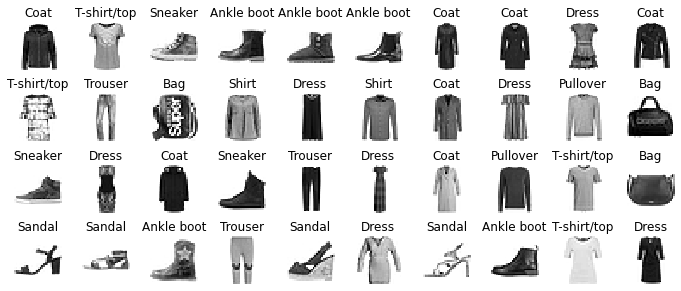

In [46]:
# List of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Let's have a look at the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [27]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
print(("The layers of the model are {}").format(model.layers))
h1 = model.layers[1]
w, b = h1.get_weights()
print(("The shape of the weights matrix is {}").format(w.shape))
print(("The shape of the bias vectort is {}").format(b.shape))

The layers of the model are [<tensorflow.python.keras.layers.core.Flatten object at 0x7f95c26df3c8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f95c22551d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f95c22555f8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f95c225c828>]
The shape of the weights matrix is (784, 300)
The shape of the bias vectort is (300,)


In [29]:
# *****************************************NOTE*****************************************
# If you do not specify the input shape Keras will wait unitl it knows the input shape before it actually builds the model.
# This will happen either when you feed the it actual data (eg during training) or when you call its build() method.

In [47]:
# Compiling the model
# After the model is created, you must call its compile() method to specify the loss function and the optimizer to use.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# sparse_categorical_crossentropy is used because for each instance we have just a target class index from 0-9
# categorical_crossentropy would be used if we had one target probability per class for each instance (ie one-hot vectors [0,0,0,0,0,0,0,0,1,0] to represent class 8)

In [48]:
# Training and Evaluating the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
# The fit method returns a history object containing the training parameters (history.params), the list of epochs it went through (history.epoch)
# and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epochs on the training
# and the validation sets

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7820 - accuracy: 0.7557 - val_loss: 0.5150 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8295 - val_loss: 0.4449 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4429 - accuracy: 0.8444 - val_loss: 0.4103 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8560 - val_loss: 0.3952 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8601 - val_loss: 0.3919 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8662 - val_loss: 0.3619 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8718 - val_loss: 0.3577 - val_accuracy:

Saving figure keras_learning_curves_plot


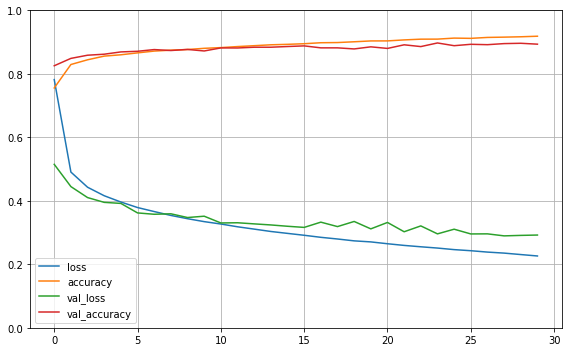

In [49]:
# Statistics
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()
# You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss
# decrease. Good! Moreover, the validation curves follow the training curves, which means that there is not too much overfitting.
# The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell
# that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training.

# If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. My preferred steps are as follows.
# 1) Learning Rate
# 2) Optimizer (retune the learning rate after you change the optimizer)
# 3) Model hyperparameters - a) Number of layers, b) Number of neurons per layer and c) The type of activation functions usedfor each hidden layers
# 4) (Optional) Batch size

In [50]:
# Now you are ready to evaluate the model on the test set to estimate the generalization error before you deploy the model to production
model.evaluate(X_test, y_test)
# It is common to get slightly lower performance on the test set than on the validation set, as the hyperparameters are tunned on the validation set

313/313 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8859


[0.32343217730522156, 0.8859000205993652]

In [54]:
# We can use the model's predict method to make predictions on new instances. Since we do not have actual new instances,
# we will just use the first three instances of the test set.
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
# The model estimates one probability per class for each instance, form class 0 to class 9. For example, for the first instance it estimates that 
# the probability of class 9 is 98% and the probability of class 7 is 2%. The rest of the class have negligible probabilities.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
# If you only care for the class with the highest probability, you can use the predict_classes() method.
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
